# Two-Sided Matching & Ranking for Credit Cards

Below is a high-level framework to build a two-sided matching system for credit cards, balancing your revenue (fees) and customers' utility (satisfaction). It also covers ranking multiple recommendations rather than suggesting just one.

---

## 1. Understand the Two-Sided Nature of the Market

1. **Supply Side (Banks & Cards)**  
   - Each bank has multiple credit card products.  
   - Attributes include:  
     - APR or interest rate  
     - Annual fee  
     - Rewards structure (cashback, miles, points, etc.)  
     - Sign-up bonus  
     - Issuance constraints (e.g., min. credit score)  
   - *Platform revenue:* Different cards/banks pay different referral commissions.

2. **Demand Side (Customers)**  
   - Each customer has attributes like:  
     - Credit score & income  
     - Spending habits & preferences  
   - They want a card that best suits their needs (max utility).  
   - "Hard constraints": Must meet credit score, location, income requirements.  
   - "Soft preferences": Type of rewards, brand preference, annual fee tolerance, etc.

**Key:** You need an approach that accounts for both sides: maximizing platform revenue (fees) and user satisfaction (utility).

---

## 2. Overall Pipeline / Flow

1. **Filtering / Eligibility Check (Hard Constraints)**  
   - Eliminate cards the customer cannot qualify for (score, income, location).
2. **Utility Modeling (Soft Criteria)**  
   - For each (customer, card) pair that survives the filter, compute a “user preference score.”  
   - This can be done via heuristic (rule-based) or ML (learning-to-rank, collaborative filtering).
3. **Revenue Modeling**  
   - Estimate expected revenue per (customer, card):  
     $$
       \text{expected\_revenue} = \text{commission}(card) \times P(\text{approval}) \times P(\text{acceptance})
     $$
4. **Combine Utility & Revenue**  
   - Use a weighted combination or multi-objective approach:  
     $$
       \text{Final Score} = \alpha \cdot \text{Utility} + (1 - \alpha) \cdot \text{Revenue}
     $$
5. **Ranking & Output**  
   - Rank feasible cards by final score and present top N suggestions.

---

## 3. Hard vs. Soft Criteria Handling

- **Hard Criteria (Filters)**  
  - Credit score thresholds, minimum income, region restrictions.  
  - Any card failing these should be removed from consideration.

- **Soft Criteria (Preferences)**  
  - Rewards type (cashback, points, miles).  
  - Annual fee tolerance.  
  - Brand preference.  
  - Use a scoring formula or ML model to assess how well each card meets user’s preferences.

---

## 4. Data & Model Considerations

### A. Data You Might Need

1. **Historical Interactions**  
   - Which cards were shown to which users.  
   - Which card they chose (if any), approval status, ongoing usage, etc.  
2. **Card Metadata**  
   - Commissions, APR, annual fees, reward structures.  
3. **User Features**  
   - Demographics, credit profile, stated preferences.

### B. Models to Consider

1. **Approval Probability Model**  
   - Probability of being approved given user’s credit score, income, etc.  
2. **Acceptance / Conversion Model**  
   - Probability the user will actually apply if shown the card.  
3. **User Satisfaction / Retention Model**  
   - If data exists, predict how satisfied the user will be over time.

---

## 5. Multi-Objective Optimization

1. **Weighted Sum Approach**  
   $$
     \text{Final Score} = \alpha \cdot U(\text{user}, \text{card}) \;+\; (1-\alpha)\times R(\text{user}, \text{card})
   $$  
   - Adjust $\alpha$ via experiments (A/B tests).
2. **Pareto Frontier**  
   - More advanced. Finds non-dominated solutions in terms of user utility & revenue.
3. **Constraint-Based**  
   - E.g., “We want at least X user utility,” then maximize revenue (or vice versa).

---

## 6. Ranking Mechanism and Presentation

1. **Top-K Ranking**  
   - Sort the feasible cards by the final score and present the top N.  
   - Optionally label them (“Best for Travel,” “No Annual Fee,” etc.) to help users.
2. **Diversity / Exploration**  
   - Consider a diversity factor if you don’t want all top recommendations from the same bank.
3. **Explainability**  
   - Show users why you’re recommending a certain card (higher approval chance, great rewards match, etc.).

---

## 7. Practical Steps to Start Implementation

1. **Data Collection & Cleaning**  
   - Gather accurate card data (APR, fees, commissions) and user data (score, preferences).
2. **Rule-Based Filter (Hard Constraints)**  
   - Immediately remove cards that don’t meet basic eligibility.
3. **Utility & Revenue Estimation**  
   - `expected_revenue = commission * prob_approve * prob_accept`  
   - `user_utility_score` can be a simple rule-based or an ML model.
4. **Combine Scores**  
   $$
     \text{final\_score} = \alpha \times \text{user\_utility\_score} \;+\; (1-\alpha)\times \text{expected\_revenue}
   $$
5. **Ranking & Display**  
   - Sort by `final_score` and present the top options.
6. **A/B Testing & Iteration**  
   - Experiment with different $\alpha$, different scoring methods, and measure outcomes.

---

## 8. Additional Nuances

- **Regulatory / Compliance**  
  - Ensure no discrimination or violation of lending regulations.
- **Bank Preferences**  
  - If banks want specific types of customers, integrate their preference as another factor in your model or constraints.
- **Cold Start Problems**  
  - For new users/cards, rely on aggregate or attribute-based estimations until real interaction data is available.
- **Online Learning / Bandit Approaches**  
  - Advanced techniques to adapt in real time based on user responses.

---

### Conclusion

1. **Filter** out ineligible cards.  
2. **Score** each candidate on both user utility and expected revenue.  
3. **Combine** those scores via a multi-objective method.  
4. **Rank** feasible cards and present top picks (not just one).  
5. **Iterate** through A/B testing to optimize both user satisfaction and your revenue.

---



=== System Evaluation for Different alpha Values ===
   Alpha  TotalExpectedRevenue  AvgUserUtility_top1
0    0.0              81079.28                 9.88
1    0.1              81078.76                 9.90
2    0.3              81069.87                 9.94
3    0.5              81000.01                10.05
4    0.7              80782.55                10.20
5    0.9              77609.98                10.98
6    1.0              63217.95                11.59


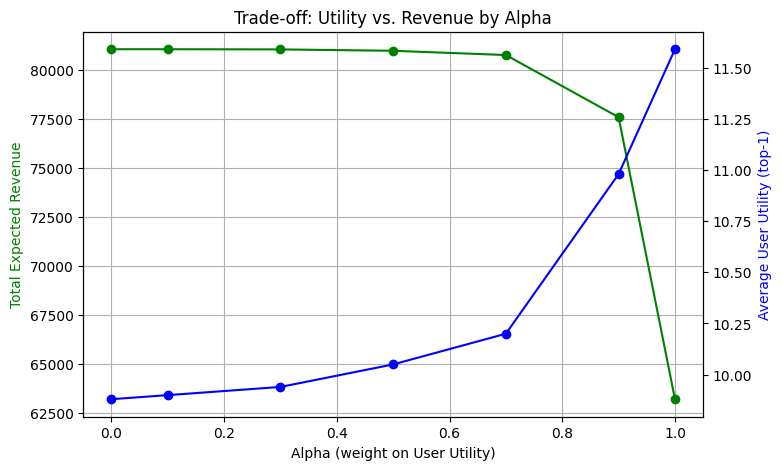


=== Example Customer Journey ===
Selected Customer ID: 524
Customer Attributes:
{'CustomerID': 524, 'CreditScore': 707, 'Income': 38210, 'RewardPreference': 'Cashback', 'MaxAnnualFee': 99, 'BrandPreference': 'Bank E', 'alpha': 0.61}

Recommended Cards (Top-5):
      Bank             Card  CreditScoreMin  Commission    APR  AnnualFee  \
0  Bank A  Bank A Card #27             602         152  12.47         49   
1  Bank E  Bank E Card #28             650         108  14.85          0   
2  Bank D  Bank D Card #12             639         131  18.10         29   
3  Bank C  Bank C Card #21             662         145  19.55         95   
4  Bank D   Bank D Card #4             620         107  17.87         95   

  RewardType  ProbApproval  ProbAcceptance  UserUtility  ExpectedRevenue  \
0   Cashback         0.950             0.7           11           101.08   
1   Cashback         0.785             0.8           16            67.82   
2   Cashback         0.840             0.7          

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# -------------------------------------------------------
# 1. GENERATE RANDOM DATA
#    - 30 card products
#    - 1000 customers
# -------------------------------------------------------

# For reproducibility, set a random seed
np.random.seed(42)
random.seed(42)

# Let's define some sets of possible attributes
BANKS = ["Bank A", "Bank B", "Bank C", "Bank D", "Bank E"]
REWARD_TYPES = ["Cashback", "Miles", "Points"]

def generate_random_cards(n_cards=30):
    """
    Generate 'n_cards' credit card records with random attributes.
    """
    card_records = []
    for i in range(n_cards):
        bank = np.random.choice(BANKS)
        card_name = f"{bank} Card #{i+1}"

        # Randomly assign min credit score (range: 600-750)
        credit_score_min = np.random.randint(600, 751)

        # Random commission (platform revenue) in dollars
        commission = np.random.randint(50, 201)  # e.g. between $50 - $200

        # APR range ~ [10%, 25%]
        apr = round(np.random.uniform(10, 25), 2)

        # Annual fee: 0, 49, 99, 199, etc.
        annual_fee_options = [0, 29, 49, 95, 99, 199]
        annual_fee = np.random.choice(annual_fee_options)

        # Reward type
        reward_type = np.random.choice(REWARD_TYPES)

        card_records.append({
            "Bank": bank,
            "Card": card_name,
            "CreditScoreMin": credit_score_min,
            "Commission": commission,
            "APR": apr,
            "AnnualFee": annual_fee,
            "RewardType": reward_type
        })
    df_cards = pd.DataFrame(card_records)
    return df_cards

def generate_random_customers(n_customers=100):
    """
    Generate 'n_customers' user/customer records with random attributes.
    Each user will have:
      - CreditScore
      - Income
      - RewardPreference
      - MaxAnnualFee
      - Possibly brand preference (soft preference for a particular bank)
      - alpha: trade-off factor (0 to 1) between utility vs. revenue
    """
    customer_records = []

    # We'll define some brand preference probability distribution
    brand_prefs = BANKS + ["NoPreference"]

    for i in range(n_customers):
        # Credit score in [600..800]
        credit_score = np.random.randint(600, 801)
        # Income in [30k..150k]
        income = np.random.randint(30000, 150001)

        # Reward preference
        reward_pref = np.random.choice(REWARD_TYPES)

        # Max annual fee tolerance (0..200 in steps)
        max_fee = np.random.choice([0, 29, 49, 95, 99, 199])

        # Brand preference (soft). Could be "NoPreference" or one of the 5 banks
        brand_pref = np.random.choice(brand_prefs)

        # alpha in [0..1], the weighting for utility vs. revenue
        alpha = round(np.random.uniform(0, 1), 2)

        customer_records.append({
            "CustomerID": i+1,
            "CreditScore": credit_score,
            "Income": income,
            "RewardPreference": reward_pref,
            "MaxAnnualFee": max_fee,
            "BrandPreference": brand_pref,
            "alpha": alpha
        })
    df_customers = pd.DataFrame(customer_records)
    return df_customers

# Generate the data
df_cards = generate_random_cards(n_cards=30)
df_customers = generate_random_customers(n_customers=1000)

# -------------------------------------------------------
# 2. FILTERING FUNCTION (HARD CONSTRAINTS)
# -------------------------------------------------------
def filter_cards(customer, df_cards):
    """
    Hard constraints:
    - customer's credit score >= card's min score
    - card's annual fee <= customer's maxAnnualFee
    """
    eligible = df_cards[
        (df_cards["CreditScoreMin"] <= customer["CreditScore"]) &
        (df_cards["AnnualFee"] <= customer["MaxAnnualFee"])
    ].copy()
    return eligible

# -------------------------------------------------------
# 3. UTILITY & REVENUE CALCULATIONS
# -------------------------------------------------------

def probability_of_approval(customer, card):
    """
    Toy model:
    Probability of approval depends on how much the customer's score
    exceeds the card's min required score.
    We'll clamp the probability to [0, 0.95].
    """
    gap = customer["CreditScore"] - card["CreditScoreMin"]
    if gap < 0:
        return 0.0
    # Make a base ~ 0.5, plus gap * 0.005
    prob = 0.5 + (gap * 0.005)
    prob = min(prob, 0.95)
    return prob

def probability_of_acceptance(customer, card):
    """
    Toy model for acceptance:
    - If reward matches user preference => 0.7 base, else 0.4
    - If bank matches user brand preference => add +0.1
    Cap at 0.95
    """
    prob = 0.4
    if card["RewardType"].lower() == customer["RewardPreference"].lower():
        prob = 0.7

    # brand preference effect
    if customer["BrandPreference"] == card["Bank"]:
        prob += 0.1

    # clamp
    prob = min(prob, 0.95)
    return prob

def user_utility_score(customer, card):
    """
    Simple heuristic-based user utility:
    - +5 if reward matches user's preference
    - + up to 5 points if APR is low
    - + up to 5 points if annual fee is low
    - +3 if brand matches user brand preference
    """
    score = 0
    # reward match
    if card["RewardType"].lower() == customer["RewardPreference"].lower():
        score += 5

    # APR: the lower the better
    apr = card["APR"]
    if apr <= 12:
        score += 5
    elif apr <= 16:
        score += 3
    else:
        score += 1

    # annual fee
    if card["AnnualFee"] == 0:
        score += 5
    elif card["AnnualFee"] <= 50:
        score += 3
    else:
        score += 1

    # brand preference
    if customer["BrandPreference"] == card["Bank"]:
        score += 3

    return score

# -------------------------------------------------------
# 4. RECOMMEND CARDS FOR A SINGLE CUSTOMER
# -------------------------------------------------------
def recommend_cards_for_customer(customer, df_cards, top_k=5):
    """
    Filter -> compute scores -> rank -> return top_k.
    """
    # Filter
    eligible = filter_cards(customer, df_cards)
    if eligible.empty:
        return pd.DataFrame()

    alpha = customer["alpha"]
    records = []
    for idx, card in eligible.iterrows():
        prob_approve = probability_of_approval(customer, card)
        prob_accept = probability_of_acceptance(customer, card)
        expected_revenue = card["Commission"] * prob_approve * prob_accept
        utility = user_utility_score(customer, card)
        final_score = alpha * utility + (1 - alpha) * expected_revenue

        records.append({
            "Bank": card["Bank"],
            "Card": card["Card"],
            "CreditScoreMin": card["CreditScoreMin"],
            "Commission": card["Commission"],
            "APR": card["APR"],
            "AnnualFee": card["AnnualFee"],
            "RewardType": card["RewardType"],
            "ProbApproval": round(prob_approve, 3),
            "ProbAcceptance": round(prob_accept, 3),
            "UserUtility": utility,
            "ExpectedRevenue": round(expected_revenue, 2),
            "FinalScore": round(final_score, 2)
        })

    df_recs = pd.DataFrame(records)
    df_recs.sort_values("FinalScore", ascending=False, inplace=True)
    df_recs.reset_index(drop=True, inplace=True)

    return df_recs.head(top_k)

# -------------------------------------------------------
# 5. EVALUATE THE SYSTEM FOR MULTIPLE ALPHAS
#    - We'll compute:
#      (a) total revenue across all customers
#      (b) average top-1 user utility across all customers
# -------------------------------------------------------
def evaluate_system_for_alphas(df_customers, df_cards, alpha_values=[0.1, 0.3, 0.5, 0.7, 0.9]):
    """
    For each alpha in alpha_values:
      - Temporarily set each customer's alpha to that alpha
      - For each customer, get top recommended card (top-1)
      - Sum expected revenue, average user utility
    Return a DataFrame summarizing the results.
    """
    results = []
    for alpha in alpha_values:
        total_revenue = 0.0
        total_utility = 0.0
        count_valid = 0

        for idx, cust in df_customers.iterrows():
            # Make a copy of the customer's data but override alpha
            customer = dict(cust)
            customer["alpha"] = alpha

            # Get top recommended card
            df_top = recommend_cards_for_customer(customer, df_cards, top_k=1)

            if not df_top.empty:
                # We only have one row here
                row = df_top.iloc[0]
                total_revenue += row["ExpectedRevenue"]
                total_utility += row["UserUtility"]
                count_valid += 1

        if count_valid == 0:
            avg_utility = 0
        else:
            avg_utility = total_utility / count_valid

        results.append({
            "Alpha": alpha,
            "TotalExpectedRevenue": round(total_revenue, 2),
            "AvgUserUtility_top1": round(avg_utility, 2)
        })

    df_eval = pd.DataFrame(results)
    return df_eval

# -------------------------------------------------------
# 6. RUN THE EVALUATION & AGGREGATE RESULTS
# -------------------------------------------------------
# Choose a set of alpha values
alpha_vals = [0.0, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
df_evaluation = evaluate_system_for_alphas(df_customers, df_cards, alpha_values=alpha_vals)

print("=== System Evaluation for Different alpha Values ===")
print(df_evaluation)

# We'll do a simple plot: alpha vs. total revenue & avg user utility
fig, ax1 = plt.subplots(figsize=(8,5))
ax2 = ax1.twinx()

ax1.plot(df_evaluation["Alpha"], df_evaluation["TotalExpectedRevenue"], 'g-o', label="Total Revenue")
ax2.plot(df_evaluation["Alpha"], df_evaluation["AvgUserUtility_top1"], 'b-o', label="Avg Utility")

ax1.set_xlabel("Alpha (weight on User Utility)")
ax1.set_ylabel("Total Expected Revenue", color='g')
ax2.set_ylabel("Average User Utility (top-1)", color='b')

plt.title("Trade-off: Utility vs. Revenue by Alpha")
ax1.grid(True)
plt.show()

# -------------------------------------------------------
# 7. DEMONSTRATE A 'CUSTOMER JOURNEY'
#    - We'll pick one random customer and show the recommended cards list
# -------------------------------------------------------
random_customer_index = np.random.randint(0, len(df_customers))
customer_journey = df_customers.iloc[random_customer_index].to_dict()

print("\n=== Example Customer Journey ===")
print(f"Selected Customer ID: {customer_journey['CustomerID']}")
print("Customer Attributes:")
print(customer_journey)

# Now let's see the top-5 recommended cards for this customer
df_customer_recs = recommend_cards_for_customer(customer_journey, df_cards, top_k=5)

if df_customer_recs.empty:
    print("No eligible cards for this customer.")
else:
    print("\nRecommended Cards (Top-5):\n", df_customer_recs)
